In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib as mpl

mpl.rcParams["font.size"] = 18
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

In [2]:
add_layers = [2]
hidd_mess = [1, 2, 3]
hidd_upd = [1, 2]
width_mess = [10, 20, 30]
width_upd = [5, 10]

comb = np.array([(al, hm, hu, wm, wu) for al in add_layers for hm in hidd_mess for hu in hidd_upd for wm in width_mess for wu in width_upd])
#train = np.zeros(shape=(len(comb), 1246))
test_data = np.zeros(shape=(len(comb), 30, 2))

for i in tqdm(range(len(comb))):
    (al, hm, hu, wm, wu) = comb[i]
    #file_train = f"./res_training3_2d/run_al2_{hm}_{hu}_{wm}_{wu}_train.txt"
    file_test = f"./res_training_combined_2d/run_al2_{hm}_{hu}_{wm}_{wu}_test.txt"
    #train[i, :] = np.loadtxt(file_train) #loss
    test_data[i, :, :] = np.loadtxt(file_test, delimiter=",") #test_loss,accuracy

100%|██████████| 36/36 [00:00<00:00, 4857.64it/s]


In [47]:
acc_max = np.mean(test_data[:, 25:, 1], axis=1)
print(acc_max.shape)
for i in range(36):
    print(f"{i}\t:\t{comb[i]} \t:\t {acc_max[i]}")

(36,)
0	:	[ 2  1  1 10  5] 	:	 0.8352876217247264
1	:	[ 2  1  1 10 10] 	:	 0.9282602148378677
2	:	[ 2  1  1 20  5] 	:	 0.9157614697319545
3	:	[ 2  1  1 20 10] 	:	 0.9367382792892279
4	:	[ 2  1  1 30  5] 	:	 0.928521232807951
5	:	[ 2  1  1 30 10] 	:	 0.934534685272563
6	:	[ 2  1  2 10  5] 	:	 0.8951360305190242
7	:	[ 2  1  2 10 10] 	:	 0.9254492520831242
8	:	[ 2  1  2 20  5] 	:	 0.8917929926714183
9	:	[ 2  1  2 20 10] 	:	 0.9148629655657062
10	:	[ 2  1  2 30  5] 	:	 0.932205601847204
11	:	[ 2  1  2 30 10] 	:	 0.8922146370846299
12	:	[ 2  2  1 10  5] 	:	 0.8928471037044472
13	:	[ 2  2  1 10 10] 	:	 0.8819295251480774
14	:	[ 2  2  1 20  5] 	:	 0.9309908643710472
15	:	[ 2  2  1 20 10] 	:	 0.9161831141451661
16	:	[ 2  2  1 30  5] 	:	 0.9246561590201787
17	:	[ 2  2  1 30 10] 	:	 0.943715490412609
18	:	[ 2  2  2 10  5] 	:	 0.8848509185824718
19	:	[ 2  2  2 10 10] 	:	 0.9216142957534383
20	:	[ 2  2  2 20  5] 	:	 0.8783706455175183
21	:	[ 2  2  2 20 10] 	:	 0.919009135628953
22	:	[ 2  2  2 30  

In [48]:
print(np.mean(acc_max))
print(np.max(acc_max))
print(np.min(acc_max))

0.9003358933172707
0.943715490412609
0.707659873506676


(36, 30, 2)
(30, 2)


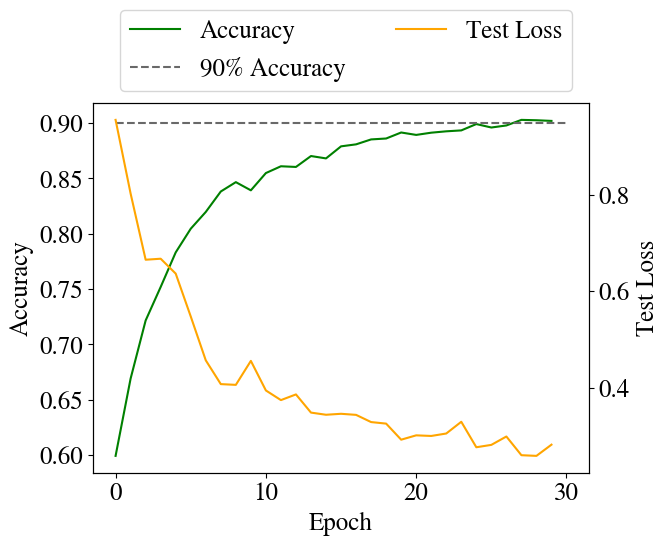

In [56]:
print(test_data.shape)
test_mean = np.mean(test_data, axis=0)
print(test_mean.shape)

fig = plt.figure()
ax_acc = fig.add_subplot()
ax_acc.plot(test_mean[:, 1], c="g", label="Accuracy")
ax_acc.set_xlabel("Epoch")
ax_acc.set_ylabel("Accuracy")
ax_acc.hlines(y=[0.90], xmin=[0], xmax=[30], color="dimgrey", linestyle="--", label="90% Accuracy")
ax_loss = ax_acc.twinx()
ax_loss.set_ylabel("Test Loss")
ax_loss.plot(test_mean[:,0], c="orange", label="Test Loss")
fig.legend(ncol=2, loc="upper center", bbox_to_anchor=(0.52, 1.1))
#fig.savefig("bravais2dAvg.png", dpi=300, bbox_inches="tight")

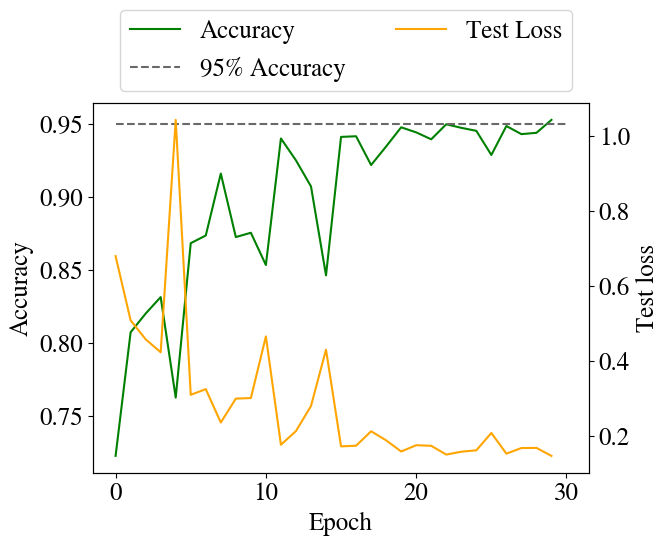

In [64]:
id_worst = 34
id_best = 17
id_plot = id_best

fig = plt.figure()
ax_acc = fig.add_subplot()
ax_acc.plot(test_data[id_plot, :, 1], c="g", label="Accuracy")
ax_acc.set_xlabel("Epoch")
ax_acc.set_ylabel("Accuracy")
ax_acc.hlines(y=[0.95], xmin=[0], xmax=[30], color="dimgrey", linestyle="--", label="95% Accuracy")
ax_loss = ax_acc.twinx()
ax_loss.set_ylabel("Test loss")
ax_loss.plot(test_data[id_plot, :,0], c="orange", label="Test Loss")
fig.legend(ncol=2, loc="upper center", bbox_to_anchor=(0.52, 1.1))
#fig.savefig("bravais2dbest.png", dpi=300, bbox_inches="tight")

(9, 4)
(9, 4, 5)
(9, 4)
(9, 4, 2)
(36, 5) (36, 2) (36,)
[[ 1  5]
 [ 1 10]
 [ 2  5]
 [ 2 10]]


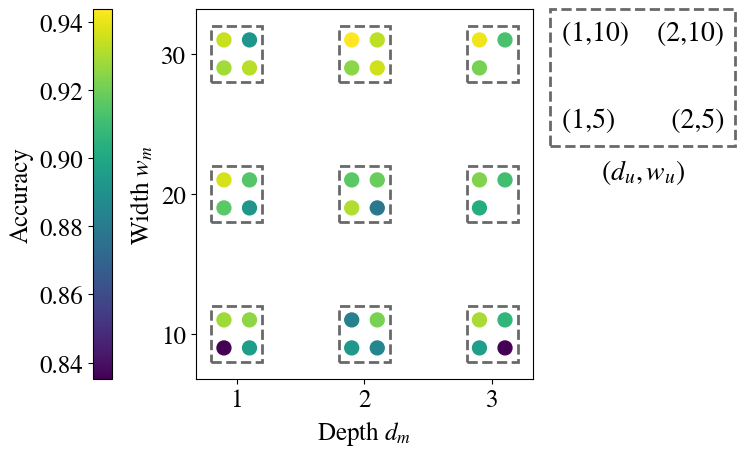

In [51]:
#Analysis depth message vs width message

#comb = (al, hm, hu, wm, wu), immer al=2
d_w_comb = np.array([(d, w) for d in hidd_mess for w in width_mess])
mask_d_w = np.array([np.flatnonzero((comb[:, 1] == d) & (comb[:, 3] == w)) for (d,w) in d_w_comb], dtype=int)
print(mask_d_w.shape)
test = comb[mask_d_w]
print(test.shape)
acc_d_w = acc_max[mask_d_w]
print(acc_d_w.shape)
d_w_coord = test[:,:,[1, 3]].astype(float)
print(d_w_coord.shape)

shift_w = 1
shift_d = 0.1
pos_shift = np.array([[-shift_d,-shift_w], [-shift_d, shift_w], [shift_d, -shift_w], [shift_d, shift_w]], dtype=float)
d_w_coord += pos_shift

d_w_coord_flat = d_w_coord.reshape((-1, 2))
test_flat = test.reshape((-1, 5))
acc_d_w_flat = acc_d_w.flatten()
print(test_flat.shape, d_w_coord_flat.shape, acc_d_w_flat.shape)

hu_du = test_flat[0:4, [2, 4]]
print(hu_du)

mask = acc_d_w_flat > 0.8
d_w_coord_flat_plt = d_w_coord_flat[mask]
acc_d_w_flat_plt = acc_d_w_flat[mask]
fig = plt.figure()
ax = fig.add_subplot()
cb = ax.scatter(x=d_w_coord_flat_plt[:, 0], y=d_w_coord_flat_plt[:, 1], c=acc_d_w_flat_plt, s=100, cmap="viridis")

for i in range(9):
    x_start = d_w_coord_flat[i*4 + 0, 0]
    y_start = d_w_coord_flat[i*4 + 0, 1]
    add_x = 0.1
    add_y = 1
    rect = mpl.patches.Rectangle((x_start - add_x, y_start - add_y), 2*(shift_d+add_x), 2*(shift_w + add_y), 
                                 linewidth=2, edgecolor='dimgrey', linestyle="--", facecolor='none')
    ax.add_patch(rect)

_ = ax.text(x=1.085, y=0.68, s="(1,10)    (2,10)\n\n\n(1,5)        (2,5)", 
            transform=ax.transAxes, fontsize=20)
_ = ax.text(x=1.2, y=0.54, s=r"$(d_u,w_u)$", 
            transform=ax.transAxes, fontsize=20)
rect = mpl.patches.Rectangle((1.05, 0.63), 0.55, 0.37, transform=ax.transAxes, clip_on=False,
                             linewidth=2, edgecolor='dimgrey', linestyle="--", facecolor='none')
ax.add_patch(rect)
                         
fig.colorbar(cb, location="left", pad=0.17, label="Accuracy")
ax.set_xlabel(r"Depth $d_m$")
ax.set_ylabel(r"Width $w_m$")
ax.set_yticks(width_mess)
ax.set_xticks(hidd_mess)

(4, 9)
(4, 9, 5)
(4, 9)
(4, 9, 2)
(36, 5) (36, 2) (36,)
[[ 1 10]
 [ 1 20]
 [ 1 30]
 [ 2 10]
 [ 2 20]
 [ 2 30]
 [ 3 10]
 [ 3 20]
 [ 3 30]]


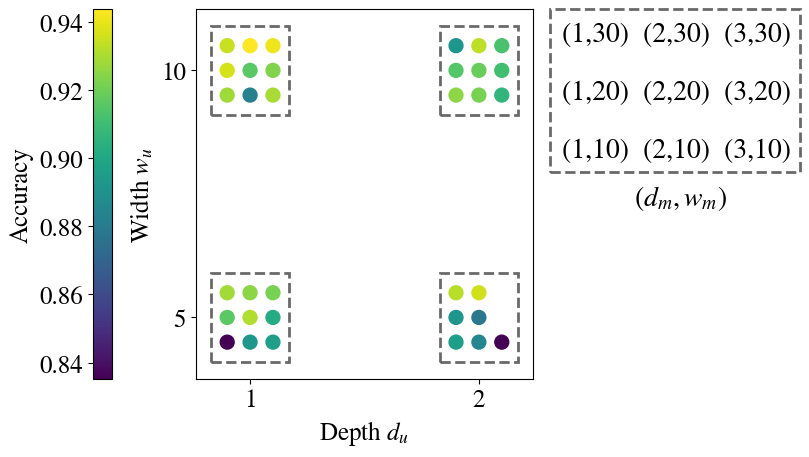

In [66]:
#Analysis depth update vs width update

#comb = (al, hm, hu, wm, wu), immer al=2
d_w_comb = np.array([(d, w) for d in hidd_upd for w in width_upd])
mask_d_w = np.array([np.flatnonzero((comb[:, 2] == d) & (comb[:, 4] == w)) for (d,w) in d_w_comb], dtype=int)
print(mask_d_w.shape)
test = comb[mask_d_w]
print(test.shape)
acc_d_w = acc_max[mask_d_w]
print(acc_d_w.shape)
d_w_coord = test[:,:,[2, 4]].astype(float)
print(d_w_coord.shape)

shift_w = 0.5
shift_d = 0.1
pos_shift = np.array([[-shift_d,-shift_w], [-shift_d, 0], [-shift_d, shift_w],
                    [0,-shift_w], [0, 0], [0, shift_w],
                    [shift_d,-shift_w], [shift_d, 0], [shift_d, shift_w]], dtype=float)
d_w_coord += pos_shift

d_w_coord_flat = d_w_coord.reshape((-1, 2))
test_flat = test.reshape((-1, 5))
acc_d_w_flat = acc_d_w.flatten()
print(test_flat.shape, d_w_coord_flat.shape, acc_d_w_flat.shape)

hm_dm = test_flat[0:9, [1, 3]]
print(hm_dm)
#print(d_w_coord)

mask = acc_d_w_flat > 0.8
d_w_coord_flat_plt = d_w_coord_flat[mask]
acc_d_w_flat_plt = acc_d_w_flat[mask]

fig = plt.figure()
ax = fig.add_subplot()
cb = ax.scatter(x=d_w_coord_flat_plt[:, 0], y=d_w_coord_flat_plt[:, 1], c=acc_d_w_flat_plt, s=100, cmap="viridis")

for i in range(4):
    x_start = d_w_coord_flat[i*9 + 0, 0]
    y_start = d_w_coord_flat[i*9 + 0, 1]
    add_x = 0.07
    add_y = 0.4
    rect = mpl.patches.Rectangle((x_start - add_x, y_start - add_y), 2*shift_d+2*add_x, 2*shift_w + 2*add_y, 
                                 linewidth=2, edgecolor='dimgrey', linestyle="--", facecolor='none')
    ax.add_patch(rect)

_ = ax.text(x=1.085, y=0.6, s="(1,30)  (2,30)  (3,30)\n\n(1,20)  (2,20)  (3,20)\n\n(1,10)  (2,10)  (3,10)", 
            transform=ax.transAxes, fontsize=20)
_ = ax.text(x=1.3, y=0.47, s=r"$(d_m,w_m)$", 
            transform=ax.transAxes, fontsize=20)
rect = mpl.patches.Rectangle((1.05, 0.56), 0.74, 0.44, transform=ax.transAxes, clip_on=False,
                             linewidth=2, edgecolor='dimgrey', linestyle="--", facecolor='none')
ax.add_patch(rect)
                         
fig.colorbar(cb, location="left", pad=0.17, label="Accuracy")
ax.set_xlabel(r"Depth $d_u$")
ax.set_ylabel(r"Width $w_u$")
ax.set_yticks(width_upd)
ax.set_xticks(hidd_upd)

#fig.savefig("wu_vs_du.png", dpi=300, bbox_inches="tight")

(6, 6)
(6, 6, 5)
(6, 6)
(6, 6, 2)
(36, 5) (36, 2) (36,)
[[1 1]
 [1 2]
 [2 1]
 [2 2]
 [3 1]
 [3 2]]


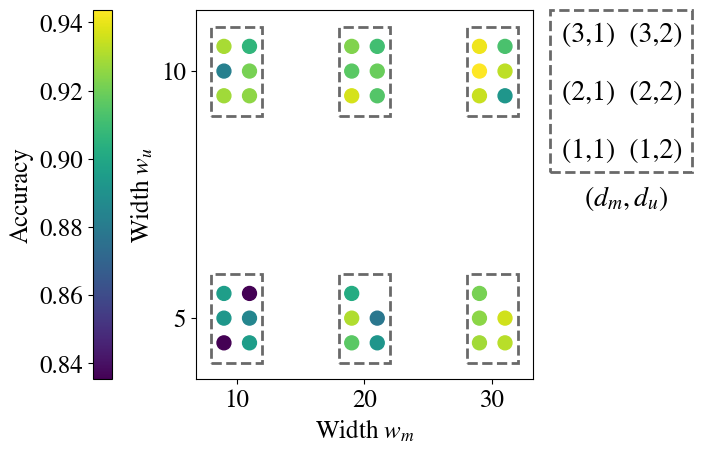

In [67]:
#Analysis width message vs width update

#comb = (al, hm, hu, wm, wu), immer al=2
wm_wu_comb = np.array([(wm, wu) for wm in width_mess for wu in width_upd])
mask_wm_wu = np.array([np.flatnonzero((comb[:, 3] == wm) & (comb[:, 4] == wu)) for (wm,wu) in wm_wu_comb], dtype=int)
print(mask_wm_wu.shape)
test = comb[mask_wm_wu]
print(test.shape)
acc_wm_wu = acc_max[mask_wm_wu]
print(acc_wm_wu.shape)
wm_wu_coord = test[:,:,[3, 4]].astype(float)
print(wm_wu_coord.shape)

shift_wm = 1
shift_wu = 0.5
pos_shift = np.array([[-shift_wm,-shift_wu], [shift_wm, -shift_wu], 
                      [-shift_wm, 0], [shift_wm, 0], 
                      [-shift_wm, shift_wu], [shift_wm, shift_wu]], dtype=float)
wm_wu_coord += pos_shift

wm_wu_coord_flat = wm_wu_coord.reshape((-1, 2))
test_flat = test.reshape((-1, 5))
acc_wm_wu_flat = acc_wm_wu.flatten()
print(test_flat.shape, wm_wu_coord_flat.shape, acc_wm_wu_flat.shape)

hm_hu = test_flat[0:6, [1, 2]]
print(hm_hu)

mask = acc_wm_wu_flat > 0.8
wm_wu_coord_flat_plt = wm_wu_coord_flat[mask]
acc_wm_wu_flat_plt = acc_wm_wu_flat[mask]

fig = plt.figure()
ax = fig.add_subplot()
cb = ax.scatter(x=wm_wu_coord_flat_plt[:, 0], y=wm_wu_coord_flat_plt[:, 1], c=acc_wm_wu_flat_plt, s=100, cmap="viridis")

for i in range(6):
    x_start = wm_wu_coord_flat[i*6 + 0, 0]
    y_start = wm_wu_coord_flat[i*6 + 0, 1]
    add_x = 1
    add_y = 0.4
    rect = mpl.patches.Rectangle((x_start - add_x, y_start - add_y), 2*shift_wm+2*add_x, 2*shift_wu + 2*add_y, 
                                 linewidth=2, edgecolor='dimgrey', linestyle="--", facecolor='none')
    ax.add_patch(rect)

_ = ax.text(x=1.085, y=0.6, s="(3,1)  (3,2)\n\n(2,1)  (2,2)\n\n(1,1)  (1,2)", 
            transform=ax.transAxes, fontsize=20)
_ = ax.text(x=1.15, y=0.47, s=r"$(d_m,d_u)$", 
            transform=ax.transAxes, fontsize=20)
rect = mpl.patches.Rectangle((1.05, 0.56), 0.42, 0.44, transform=ax.transAxes, clip_on=False,
                             linewidth=2, edgecolor='dimgrey', linestyle="--", facecolor='none')
ax.add_patch(rect)
                         
fig.colorbar(cb, location="left", pad=0.17, label="Accuracy")
ax.set_xlabel(r"Width $w_m$")
ax.set_ylabel(r"Width $w_u$")
ax.set_yticks(width_upd)
ax.set_xticks(width_mess)

fig.savefig("wu_vs_wm.png", dpi=300, bbox_inches="tight")

(6, 6)
(6, 6, 5)
(6, 6)
(6, 6, 2)
(36, 5) (36, 2) (36,)
[[10  5]
 [10 10]
 [20  5]
 [20 10]
 [30  5]
 [30 10]]


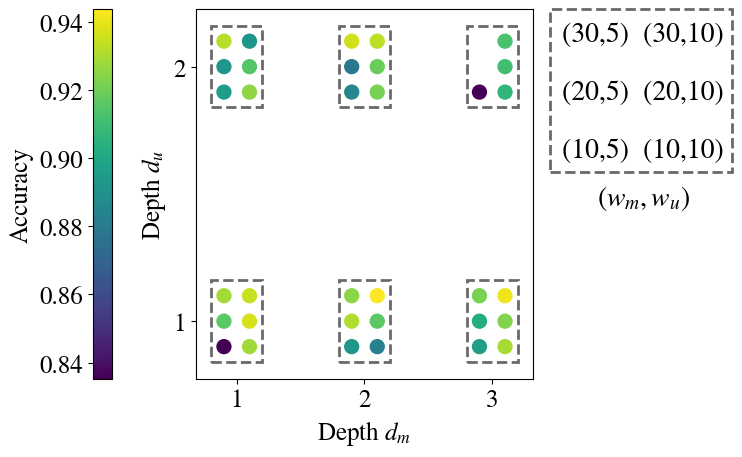

In [54]:
#Analysis depth message vs depth update

#comb = (al, hm, hu, wm, wu), immer al=2
dm_du_comb = np.array([(dm, du) for dm in hidd_mess for du in hidd_upd])
mask_dm_du = np.array([np.flatnonzero((comb[:, 1] == dm) & (comb[:, 2] == du)) for (dm,du) in dm_du_comb], dtype=int)
print(mask_dm_du.shape)
test = comb[mask_dm_du]
print(test.shape)
acc_dm_du = acc_max[mask_dm_du]
print(acc_dm_du.shape)
dm_du_coord = test[:,:,[1, 2]].astype(float)
print(dm_du_coord.shape)

shift_dm = 0.1
shift_du = 0.1
pos_shift = np.array([[-shift_dm,-shift_du], [shift_dm, -shift_du], 
                      [-shift_dm, 0], [shift_dm, 0], 
                      [-shift_dm, shift_du], [shift_dm, shift_du]], dtype=float)
dm_du_coord += pos_shift

dm_du_coord_flat = dm_du_coord.reshape((-1, 2))
test_flat = test.reshape((-1, 5))
acc_dm_du_flat = acc_dm_du.flatten()
print(test_flat.shape, dm_du_coord_flat.shape, acc_dm_du_flat.shape)

wm_wu = test_flat[0:6, [3, 4]]
print(wm_wu)

mask = acc_dm_du_flat > 0.8
dm_du_coord_flat_plt = dm_du_coord_flat[mask]
acc_dm_du_flat_plt = acc_dm_du_flat[mask]

fig = plt.figure()
ax = fig.add_subplot()
cb = ax.scatter(x=dm_du_coord_flat_plt[:, 0], y=dm_du_coord_flat_plt[:, 1], c=acc_dm_du_flat_plt, s=100, cmap="viridis")

for i in range(6):
    x_start = dm_du_coord_flat[i*6 + 0, 0]
    y_start = dm_du_coord_flat[i*6 + 0, 1]
    add_x = 0.1
    add_y = 0.06
    rect = mpl.patches.Rectangle((x_start - add_x, y_start - add_y), 2*shift_dm+2*add_x, 2*shift_du + 2*add_y, 
                                 linewidth=2, edgecolor='dimgrey', linestyle="--", facecolor='none')
    ax.add_patch(rect)

_ = ax.text(x=1.085, y=0.6, s="(30,5)  (30,10)\n\n(20,5)  (20,10)\n\n(10,5)  (10,10)", 
            transform=ax.transAxes, fontsize=20)
_ = ax.text(x=1.19, y=0.47, s=r"$(w_m,w_u)$", 
            transform=ax.transAxes, fontsize=20)
rect = mpl.patches.Rectangle((1.05, 0.56), 0.54, 0.44, transform=ax.transAxes, clip_on=False,
                             linewidth=2, edgecolor='dimgrey', linestyle="--", facecolor='none')
ax.add_patch(rect)
                         
fig.colorbar(cb, location="left", pad=0.17, label="Accuracy")
ax.set_xlabel(r"Depth $d_m$")
ax.set_ylabel(r"Depth $d_u$")
ax.set_yticks(hidd_upd)
ax.set_xticks(hidd_mess)